# INSTACART MARKET BASKET ANALYSIS

Instacart Project:
Instacart is an online grocery application where a customer can order online and a shopper would do the shopping and deliver the groceries to them.
There are 6 datasets available here:
1. prior ordered products: Specify the order id,product id, order at which the product is added to the basket per order, and if the product is reordered.

2. products: includes the product's id, name of product, aisle id, and department id.

3. order products train:

4. aisles: includes the aisle id and at what the aisle id correspond to, such as specialty cheeses, energy granola bars, etc.

5. orders: includes the order number,user id,

6. departments: includes department id and what department is the grocery in.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
prior_order = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')
order_products_train = pd.read_csv('order_products__train.csv')
aisles = pd.read_csv('aisles.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')

# Data Wrangling

In data wrangling, we would like to check for any missing values, any variables that are mistakenly input into the data, and fill out the missing values with other values or simply drop them if they do not really help out with the data and if there are not a lot of data to be excluded.

In [3]:
#find out how the prior order table looks like
print(prior_order.shape)
prior_order.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
#check if there is any missing values in the prior order table
prior_order.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Prior order indicates that there are no missing values

In [5]:
orders.shape

(3421083, 7)

In [6]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
average_order_hours = orders.groupby('user_id').agg({'order_hour_of_day':'mean'})

In [8]:
average_order_hours.reset_index(inplace=True,drop=False)

In [9]:
orders = pd.merge(orders,average_order_hours,on='user_id',how='left')

The graph above shows the average hour of day that the customer orders.

In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day_x,days_since_prior_order,order_hour_of_day_y
0,2539329,1,prior,1,2,8,NaN,10.090909
1,2398795,1,prior,2,3,7,15.0,10.090909
2,473747,1,prior,3,3,12,21.0,10.090909
3,2254736,1,prior,4,4,7,29.0,10.090909
4,431534,1,prior,5,4,15,28.0,10.090909


In [11]:
#rename all the columns:
orders.columns = ['order_id','user_id','eval_set','order_number','order_dow','order_hour_of_day',
                  'days_since_prior_order','average_order_hour_of_day']

In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
0,2539329,1,prior,1,2,8,NaN,10.090909
1,2398795,1,prior,2,3,7,15.0,10.090909
2,473747,1,prior,3,3,12,21.0,10.090909
3,2254736,1,prior,4,4,7,29.0,10.090909
4,431534,1,prior,5,4,15,28.0,10.090909


In [13]:
missing_orders = orders.isnull().sum()
missing_orders

order_id                          0
user_id                           0
eval_set                          0
order_number                      0
order_dow                         0
order_hour_of_day                 0
days_since_prior_order       206209
average_order_hour_of_day         0
dtype: int64

Based on the data above, we can see that there are no missing values for all the columns except for "days_since_prior_order", where it has 206209 missing values.

In [14]:
total_orders = orders.isnull().count()

In [15]:
percentage_orders = missing_orders/total_orders
percentage_orders

order_id                     0.000000
user_id                      0.000000
eval_set                     0.000000
order_number                 0.000000
order_dow                    0.000000
order_hour_of_day            0.000000
days_since_prior_order       0.060276
average_order_hour_of_day    0.000000
dtype: float64

The table above indicates that the column "days_since_prior_orders" has 6% missing values, as we can see they are indicated by "NaN". However, this NaN indicates that the person has not previously ordered using instacart. Thus, it is possible that we might have to divide the data into two where one would have ordered previously while the other does not.

In [16]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06,3.421083e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01,1.345202e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00,1.803192e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e-01
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,1.226667e+01
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,1.345455e+01
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.462500e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,2.300000e+01


The orders indicate that there is no value that lies beyond the reasonable value. For example, order hour of day is between 0:00 and 23:00 and order day of week is between  0 and 6

In [17]:
products.shape

(49688, 4)

In [18]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
null_products = products[products.isnull().any(axis=1)]
null_products

,product_id,product_name,aisle_id,department_id


We can see from the above that there is no null values in the products table. 

In [20]:
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
null_train = order_products_train[order_products_train.isnull().any(axis=1)]

In [22]:
null_train

,order_id,product_id,add_to_cart_order,reordered


Based on the above analysis, we can see that the 'orders' dataframe has missing values which are "NaN." However, the NaN values are only observed in the column 'days since prior order.' This indicates that the customer has never ordered previously.

In [23]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [24]:
departments.isnull().any(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

The departments data table also has no missing values after being tested for missing values using is null function.

In [25]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [26]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

There are no missing values in aisles table.

# Conclusion of Data Wrangling:

Overall the data is pretty clean and there are no outliers or missing values. The only table that needs to be cleaned is the orders table since it has a "NaN" value which includes customers that have no historical order and thus cannot be analyzed. Fortunately, it only compromise 6% of the total data we have and allows us to exclude them from our analysis.

Thus, we can see that most of the data wrangling work are joining the different tables together in order to analyze the data.

# Data Visualization and Data Exploration

Since the data is all cleaned now, it would be good to explore the data and visualize them to get an idea of how we could predict our data. For instance, we could do data visualization to figure out how do orders vary in a week. Also, we could use data visualization to figure out how long does it take on average for one to reorder his groceries.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [28]:
"""Analyze the orders Dataset based on its evaluation set: prior, train, 
or test to find out how to split them."""
total_set = orders['eval_set'].count()
orders_eval = orders['eval_set'].value_counts()
evaluation_ratio = orders_eval/total_set
evaluation_ratio

prior    0.939724
train    0.038353
test     0.021923
Name: eval_set, dtype: float64

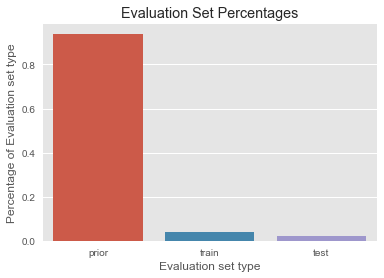

In [29]:
sns.barplot(x = evaluation_ratio.index,y=evaluation_ratio.values)
plt.xlabel("Evaluation set type")
plt.ylabel("Percentage of Evaluation set type")
plt.title("Evaluation Set Percentages")

([<matplotlib.axis.XTick at 0x111b78080>,
 <a list of 7 Text xticklabel objects>)

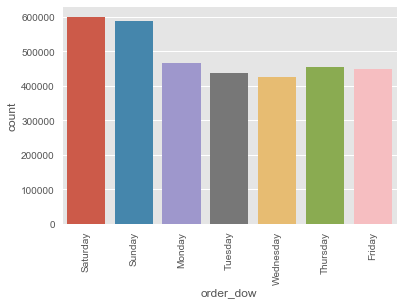

In [30]:
#count how many people shop in each day of the week with 0 = Saturday
sns.countplot(x='order_dow',data=orders)
plt.xticks(np.arange(7),('Saturday','Sunday','Monday','Tuesday','Wednesday',
                         'Thursday','Friday'),rotation='vertical')

We can see that from the chart above, most people order their groceries on Sunday and Monday, and lowest on Thursday.

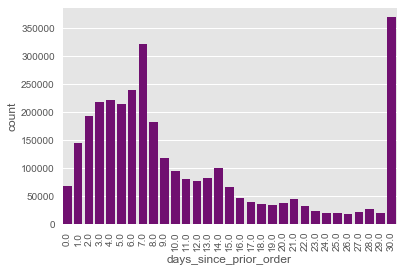

In [31]:
"""
Figure out how long does it take one to re-order his or her groceries.
"""

sns.countplot(orders['days_since_prior_order'],data=orders,color='purple')
plt.xticks(rotation=90)
plt.show()

The plot above shows that most people re-order their items after every 7 days and 30 days. The interquartile range for this data is 4-15 and at first we might think that anything above that might be consider not so relevant but after looking that most people re-order after 30 days, this might have to be kept.



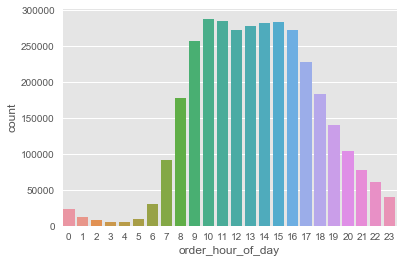

In [32]:
#find out at which time of the day do people usually shop
sns.countplot(x='order_hour_of_day',data=orders)

We can see that most people order their groceries between 9am until 4pm,which is during working hours.

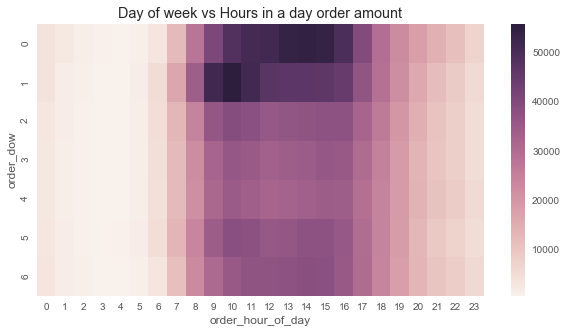

In [33]:
#Figure out days that have the most number of orders and at what time
week_vs_hours = orders.groupby(['order_dow','order_hour_of_day'])['user_id'].aggregate("count").reset_index()


#use heatmap to indicate at which day and at which hour is the most popular
week_vs_hours = week_vs_hours.pivot('order_dow','order_hour_of_day','user_id')
plt.figure(figsize=(10,5))
sns.heatmap(week_vs_hours)
plt.title('Day of week vs Hours in a day order amount')
plt.show()


The heatmap above indicates that most orders occur around 9-10am on Monday and around 2-4pm on Sunday. Least orders happen around 2-4am, which is the time when people sleep.

In [34]:
products_ordered = pd.merge(prior_order,products,on='product_id',how='left')
products_ordered.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [35]:
#find out which product is the most popular item
popular_products = products_ordered['product_name'].value_counts()

In [36]:
top20_products = pd.DataFrame(popular_products.sort_values(ascending=False).head(20).reset_index())
top20_products.columns = ['product_name','number_of_orders']
top20_products

,product_name,number_of_orders
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


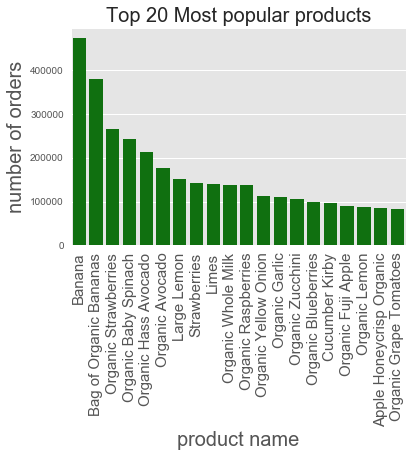

In [37]:
sns.barplot(x = 'product_name',y='number_of_orders', data = top20_products,color = 'green')
plt.xticks(rotation=90,fontsize = 15)
plt.xlabel('product name',fontsize = 20)
plt.ylabel('number of orders',fontsize = 20)
plt.title('Top 20 Most popular products',fontsize = 20)

We can see that the top 20 items include mostly fruits and vegetables, with banana being the most popular item being ordered, followed strawberries.

In [38]:
#find out which products have high reordered rate
reordered = products_ordered.groupby('product_name')['reordered'].mean().sort_values(ascending=False)
reordered = reordered.head(20)
reordered

product_name
Raw Veggie Wrappers                         0.941176
Serenity Ultimate Extrema Overnight Pads    0.931034
Orange Energy Shots                         0.923077
Chocolate Love Bar                          0.920792
Soy Powder Infant Formula                   0.914286
Simply Sleep Nighttime Sleep Aid            0.911111
Energy Shot, Grape Flavor                   0.909091
Sparking Water                              0.900000
Maca Buttercups                             0.900000
Russian River Valley Reserve Pinot Noir     0.900000
Bars Peanut Butter                          0.895522
Soy Crisps Lightly Salted                   0.893939
Jet Fuel Dark Roast Whole Bean Coffee       0.892857
High Gravity Lager                          0.891892
Benchbreak Chardonnay                       0.891892
Buttery Spray                               0.888889
Almond Orgeat Syrup                         0.888889
Organic Blueberry B Mega                    0.885417
Beer Can                         

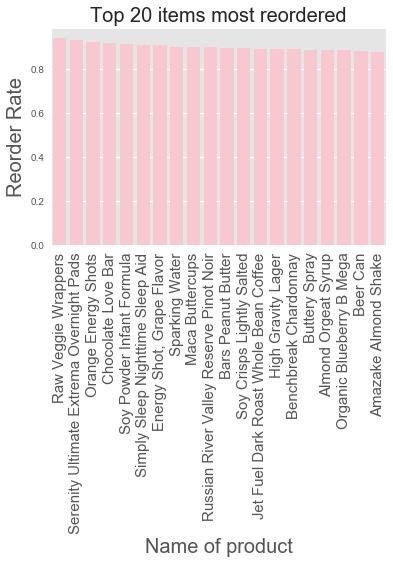

In [39]:
sns.barplot(reordered.index,reordered.values,color='pink')
plt.xticks(rotation='vertical',fontsize = 15)
plt.ylabel('Reorder Rate',fontsize = 20)
plt.xlabel('Name of product',fontsize = 20)
plt.title('Top 20 items most reordered',fontsize = 20)

we can see that from the above graph, the 20 most reodered items. Surprisingly, vegetables and fruits do not make it into the top 20 list.

In [40]:
department_merged_products = pd.merge(products_ordered,departments,how='left',on='department_id')

In [41]:
department_merged_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,Garlic Powder,104,13,pantry
3,2,45918,4,1,Coconut Butter,19,13,pantry
4,2,30035,5,0,Natural Sweetener,17,13,pantry


In [42]:
#figure out what the top 20 aisles are
a = department_merged_products['department'].value_counts()
a_20 = a.sort_values(ascending=False)[0:20]
a_20

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
Name: department, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

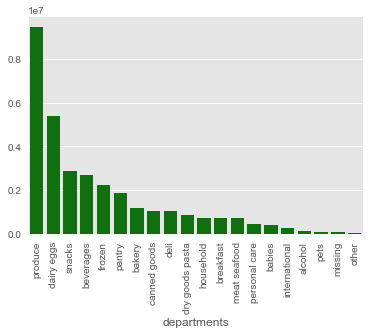

In [43]:
sns.barplot(a_20.index,a_20.values,color='green')
plt.xlabel('departments')
plt.xticks(rotation='vertical')

The top aisles that are most purchased by customers include: produce, dairy eggs,snacks,beverages,etc.

#find out how many items does a person buy based on days since prior order.
#check if people who order after 20 days buy more items than those who do not

In [44]:
"""merge the two data tables: orders and prior order to figure out the correlation 
between the number of items per order and how long it takes one to reorder afterwards.
By doing so, we can figure out if people who order more items take longer time to reorder?
"""

#we only want 'prior' order here
orders_and_prior = pd.merge(orders,prior_order,how='right',on='order_id')

In [45]:
orders_and_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,10.090909,196,1,0
1,2539329,1,prior,1,2,8,NaN,10.090909,14084,2,0
2,2539329,1,prior,1,2,8,NaN,10.090909,12427,3,0
3,2539329,1,prior,1,2,8,NaN,10.090909,26088,4,0
4,2539329,1,prior,1,2,8,NaN,10.090909,26405,5,0


In [46]:
orders_and_prior.isnull().sum()

order_id                           0
user_id                            0
eval_set                           0
order_number                       0
order_dow                          0
order_hour_of_day                  0
days_since_prior_order       2078068
average_order_hour_of_day          0
product_id                         0
add_to_cart_order                  0
reordered                          0
dtype: int64

In [47]:
k1 = orders_and_prior.groupby('order_id')['add_to_cart_order'].max().reset_index()
k2 = orders_and_prior.groupby('order_id')['days_since_prior_order'].mean().reset_index()

In [48]:
k3 = pd.merge(k1,k2,on='order_id')

In [49]:
k3.head()

,order_id,add_to_cart_order,days_since_prior_order
0,2,9,8.0
1,3,8,12.0
2,4,13,7.0
3,5,26,9.0
4,6,3,30.0


In [50]:
k3.dropna().head()

,order_id,add_to_cart_order,days_since_prior_order
0,2,9,8.0
1,3,8,12.0
2,4,13,7.0
3,5,26,9.0
4,6,3,30.0


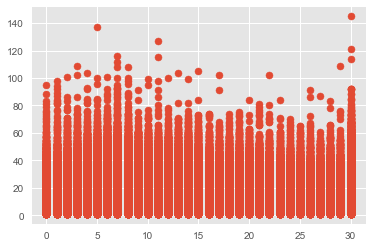

In [51]:
plt.scatter(x='days_since_prior_order',y='add_to_cart_order',data=k3)

Based on the graph above, it can be seen that there is no clear correlation between the number of days it takes someone to do grocery shopping and the number of distinct items purchased. 

In [52]:
"""
Join Department and products table to see what products are under a certain department

"""


products_dept = pd.merge(products,departments,on='department_id', how='right')
products_dept.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,Nacho Cheese White Bean Chips,107,19,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks


In [53]:
products_dept_aisle = pd.merge(products_dept,aisles, on = 'aisle_id',how='right')
products_dept_aisle.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [54]:
dept_aisle = pd.DataFrame(products_dept_aisle.groupby(['department','aisle'])['aisle_id'].count())
dept_aisle.columns = ['Number of Products']
dept_aisle.head()

Number of Products
department aisle                                         
alcohol    beers coolers                              385
           red wines                                  232
           specialty wines champagnes                  95
           spirits                                    195
           white wines                                147

In [55]:
orders_products = pd.merge(products_dept,orders_and_prior,on='product_id',how='right')
orders_products.head()

,product_id,product_name,aisle_id,department_id,department,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,snacks,3139998,138,prior,28,6,11,3.0,12.545455,5,0
1,1,Chocolate Sandwich Cookies,61,19,snacks,1977647,138,prior,30,6,17,20.0,12.545455,1,1
2,1,Chocolate Sandwich Cookies,61,19,snacks,389851,709,prior,2,0,21,6.0,19.833333,20,0
3,1,Chocolate Sandwich Cookies,61,19,snacks,652770,764,prior,1,3,13,NaN,12.500000,10,0
4,1,Chocolate Sandwich Cookies,61,19,snacks,1813452,764,prior,3,4,17,9.0,12.500000,11,1


In [56]:
orders_products.reset_index(inplace=True)

In [57]:
orders_products.isnull().sum()

index                              0
product_id                         0
product_name                       0
aisle_id                           0
department_id                      0
department                         0
order_id                           0
user_id                            0
eval_set                           0
order_number                       0
order_dow                          0
order_hour_of_day                  0
days_since_prior_order       2078068
average_order_hour_of_day          0
add_to_cart_order                  0
reordered                          0
dtype: int64

In [58]:
orders_per_product = orders_products.groupby('department')['order_id'].count()
No_orders_per_dept = pd.DataFrame(orders_per_product).reset_index()
No_orders_per_dept.head()

,department,order_id
0,alcohol,153696
1,babies,423802
2,bakery,1176787
3,beverages,2690129
4,breakfast,709569


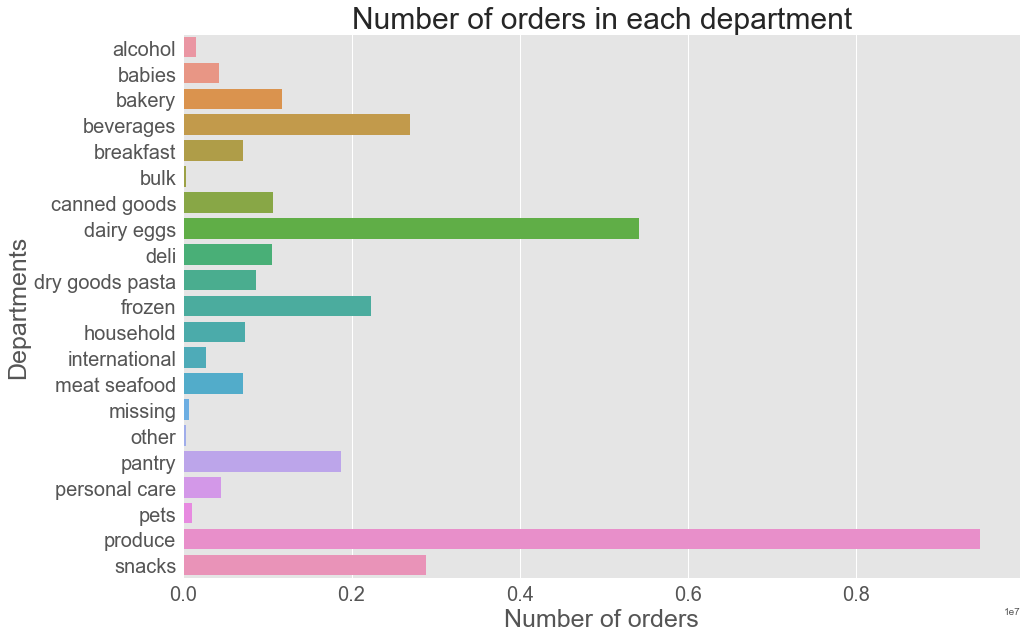

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'order_id',y='department',data=No_orders_per_dept)
plt.yticks(size=20)
plt.xticks(size=20)
plt.ylabel('Departments',fontsize= 25)
plt.xlabel('Number of orders',fontsize=25)
plt.title('Number of orders in each department',fontsize=30)

From the graph above, we can see that most people order from the produce department, followed by the dairy eggs department, followed by snacks and beverages.

In [60]:
orders_and_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,10.090909,196,1,0
1,2539329,1,prior,1,2,8,NaN,10.090909,14084,2,0
2,2539329,1,prior,1,2,8,NaN,10.090909,12427,3,0
3,2539329,1,prior,1,2,8,NaN,10.090909,26088,4,0
4,2539329,1,prior,1,2,8,NaN,10.090909,26405,5,0


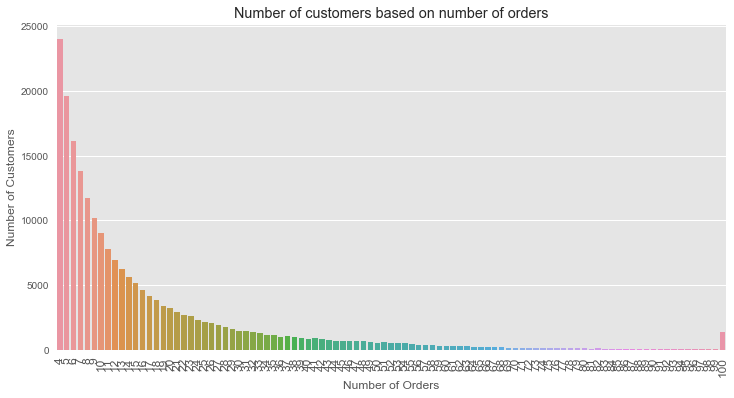

In [61]:
#Analyze how many orders does each customer have
#group the orders and prior orders based on number of orders and how many customers in each segment
orders_per_user = orders.groupby('user_id')['order_number'].max().value_counts()
orders_per_user = pd.DataFrame(orders_per_user).reset_index() #reset index
orders_per_user.columns = ['Number of orders','Count'] #rename the columns
plt.figure(figsize = (12,6))
sns.barplot(orders_per_user['Number of orders'],orders_per_user['Count'])
plt.xticks(rotation= 'vertical',size = 12)
plt.xlabel('Number of Orders',size = 12)
plt.ylabel('Number of Customers',size = 12)
plt.title('Number of customers based on number of orders')



From the graph above, we can see that the number of orders per customer is between 4 and 100 and that we could not simply remove outlier since we can see that there are a handful number of customers who have ordered 100 times. In general, the number of customers decreases as the number of orders increases.

# Statistical Analysis

In [62]:
from scipy import stats


Hypothesis Testing

For the hypothesis testing, we define the following:

Null Hypothesis: There is no relationship between day of the week and the hour at which one orders his or her grocery

Alternate Hypothesis: There is a relationship between day of week and the hour at which one orders his or her grocery.

We will assume our significance level, $\alpha$ to be 0.05.



In [63]:
week_vs_hours = orders.pivot_table('order_id','order_dow','order_hour_of_day',aggfunc='count').reset_index()
del week_vs_hours.columns.name
week_vs_hours = week_vs_hours.set_index('order_dow')
week_vs_hours

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


In [64]:
chi2, p, dof, expected = stats.chi2_contingency(week_vs_hours)

In [65]:
chi2

13722.50153097765

In [66]:
p

0.0

The p-value is below the 5% significance level, which indicates that we have to reject the null hypothesis and that there is significant relationship between the hour of day at which one orders his or her grocery and the day of the week.

Next, I would like to figure out if one buys more items the longer he or she is since last groceries.

Null Hypothesis: There is no correlation between the number of days it takes one to reorder and the number of items one buys

Alternative Hypothesis: There is correlation between the number of days it takes one to reorder and number of items one buys.

In [67]:
"""
Use chi-square test to find if the number of orders is related
to the day of week. For instance, is there more orders on Monday
than on Saturday???
"""

historical_orders = pd.merge(prior_order, orders, on='order_id',how='left')
historical_orders = historical_orders.dropna()
historical_orders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
0,2,33120,1,1,202279,prior,3,5,9,8.0,11.666667
1,2,28985,2,1,202279,prior,3,5,9,8.0,11.666667
2,2,9327,3,0,202279,prior,3,5,9,8.0,11.666667
3,2,45918,4,1,202279,prior,3,5,9,8.0,11.666667
4,2,30035,5,0,202279,prior,3,5,9,8.0,11.666667


In [68]:
order_size_per_order= historical_orders.groupby('order_id').size()

In [69]:
order_size_per_order.columns = ['Number_Of_items']

In [70]:
order_size_per_order = pd.DataFrame(order_size_per_order).reset_index()
order_size_per_order.columns = ['order_id','No_Of_orders']


In [71]:
days_vs_orders = pd.merge(order_size_per_order,orders,on='order_id',how='left')


In [72]:
days_vs_orders.head()

,order_id,No_Of_orders,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
0,2,9,202279,prior,3,5,9,8.0,11.666667
1,3,8,205970,prior,16,5,17,12.0,13.192308
2,4,13,178520,prior,36,1,9,7.0,9.087719
3,5,26,156122,prior,42,6,16,9.0,13.358491
4,6,3,22352,prior,4,1,12,30.0,13.777778


In [73]:
stats.pearsonr(x = days_vs_orders['days_since_prior_order'],y =days_vs_orders['No_Of_orders'])

(0.05938871618766222, 0.0)

Based on the pearson correlation test, we can see that the p-value is 0, which means that we can reject null hypothesis, that there is correlation between days since prior order and the number of items one orders. However, we can also see that the correlation coefficient is very low, which is only 0.05, meaning that we can also say that they are very weakly correlated, almost close to 0.

# FEATURE ENGINEERING



I will be figuring out what kind of input variables should be included and analyze to be able to know which features are actually important in helping predict which products are going to get reordered by each user.

# User Features

Features we would like to consider: (ONLY USE PRIOR ORDER)

1. How often the user reorders     ('Average Number of days to repurchase')

2. Time of day the user visits and usually on what day

3. List of distinct products

4. Order size

5. Total Number of Items in each order

6. Average Basket Size

7. How many of the user's orders contained no previously purchased orders

In [245]:
users = pd.DataFrame()

In [246]:
users['average_days_between_orders'] = orders.groupby('user_id')['days_since_prior_order'].mean() 
users['Total_orders'] = orders.groupby('user_id').size()
users['total_items'] = orders_and_prior.groupby('user_id').size()
users['All_products'] = orders_and_prior.groupby('user_id')['product_id'].apply(set)
users['total_distinct_items'] = users.All_products.map(len)
users['average_basket'] = users.total_items / users.Total_orders
users=users.reset_index()
users=users.set_index('user_id',drop=False)
print(users.shape)
users.head()

(206209, 7)


,user_id,average_days_between_orders,Total_orders,total_items,All_products,total_distinct_items,average_basket
user_id,,,,,,,
1,1,19.000000,11,59,"{17122, 196, 26405, 14084, 46149, 26088, 13032...",18,5.363636
2,2,16.285714,15,195,"{45066, 2573, 18961, 1559, 32792, 23, 22559, 1...",102,13.000000
3,3,12.000000,13,88,"{17668, 44683, 48523, 21903, 14992, 21137, 324...",33,6.769231
4,4,17.000000,6,18,"{21573, 17769, 35469, 43704, 37646, 1200, 1186...",17,3.000000
5,5,11.500000,5,37,"{28289, 11777, 40706, 48775, 20754, 6808, 1398...",23,7.400000


# Product Features

For the products, there are several features that I am interested in:

1. How often is the product purchased

2. What is the product's position in the cart?

In [115]:
#product- analysis:
df_products = pd.DataFrame()
#look for re-order rate of each product



In [116]:
df_products['total_order'] = orders_and_prior2.groupby('product_id').size()

In [117]:
df_products['Number_of_times_reordered'] = orders_products.groupby('product_id')['reordered'].sum()


In [118]:
#check for missing values
df_products['Number_of_times_reordered'].isnull().sum()

0

In [119]:
df_products['reorder_rate'] = (df_products['Number_of_times_reordered'])/(df_products['total_order'])

In [120]:
df_products.reset_index(inplace=True)

In [121]:
average_add_to_cart_order = orders_and_prior2.groupby('product_id')['add_to_cart_order'].mean().reset_index()
df_products2 = df_products.merge(average_add_to_cart_order,on='product_id',how='left')

In [122]:
df_products2.head()

,product_id,total_order,Number_of_times_reordered,reorder_rate,add_to_cart_order
0,1,1754,1136,0.647662,5.785063
1,2,87,12,0.137931,9.241379
2,3,260,203,0.780769,6.284615
3,4,290,147,0.506897,9.337931
4,5,14,9,0.642857,6.714286


In [123]:
df_products3 = pd.merge(df_products2,products,on='product_id',how = 'left')

In [124]:
df_products3 = df_products3.rename(columns = {'add_to_cart_order':'average_add_to_cart_order'})

In [125]:
df_products3.head()

,product_id,total_order,Number_of_times_reordered,reorder_rate,average_add_to_cart_order,product_name,aisle_id,department_id
0,1,1754,1136,0.647662,5.785063,Chocolate Sandwich Cookies,61,19
1,2,87,12,0.137931,9.241379,All-Seasons Salt,104,13
2,3,260,203,0.780769,6.284615,Robust Golden Unsweetened Oolong Tea,94,7
3,4,290,147,0.506897,9.337931,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,14,9,0.642857,6.714286,Green Chile Anytime Sauce,5,13


In [126]:
"""
join the df_products with the departments dataframe to figure out which department has
highest re-order rate
"""
#departments.reset_index(inplace=True, drop=False)

'\njoin the df_products with the departments dataframe to figure out which department has\nhighest re-order rate\n'

In [127]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [128]:
df_products_dept = pd.merge(df_products3,departments,on='department_id',how='left')

In [129]:
df_products_dept.head()

,product_id,total_order,Number_of_times_reordered,reorder_rate,average_add_to_cart_order,product_name,aisle_id,department_id,department
0,1,1754,1136,0.647662,5.785063,Chocolate Sandwich Cookies,61,19,snacks
1,2,87,12,0.137931,9.241379,All-Seasons Salt,104,13,pantry
2,3,260,203,0.780769,6.284615,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,290,147,0.506897,9.337931,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,14,9,0.642857,6.714286,Green Chile Anytime Sauce,5,13,pantry


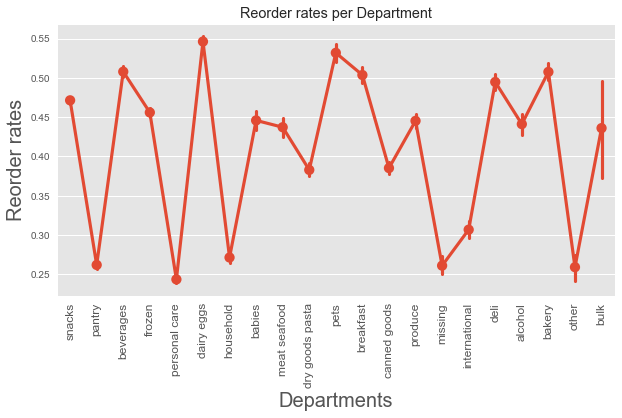

In [130]:
#Analyze which department has most re-order rates:
plt.figure(figsize = (10,5))
sns.pointplot(x = 'department',y = 'reorder_rate',data = df_products_dept)
plt.xticks(rotation = 90,size = 12)
plt.xlabel('Departments',size = 20)
plt.ylabel('Reorder rates', size = 20)
plt.title('Reorder rates per Department')

The graph above shows which department has high re-order rates.

We can see that the departments with high reorder rates include snacks,beverages,dairy eggs,babies, meat seafood,pets, breakfast,produce,bakery,deli, and bulk. This is not a surprise since beverages such as water, milk, soda, etc is taken usually on a regular basis and has high probability of getting reordered. Produce also has a pretty high reorder rate as people eat them regularly to stay healthy.

In [131]:
#Does reordered items usually get added to the cart first or last?
plt.figure(figsize = (8,5))
products_reorder = pd.merge(df_products3,prior_order,on='product_id',how='left')

In [132]:
products_reorder.head(2)

,product_id,total_order,Number_of_times_reordered,reorder_rate,average_add_to_cart_order,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,1754,1136,0.647662,5.785063,Chocolate Sandwich Cookies,61,19,1107,7,0
1,1,1754,1136,0.647662,5.785063,Chocolate Sandwich Cookies,61,19,5319,3,1


In [133]:
products_reorder_addtocart = products_reorder.groupby('add_to_cart_order')['reorder_rate'].mean()

In [134]:
products_reorder_addtocart = products_reorder_addtocart.reset_index()

In [135]:
products_reorder_addtocart.head()

,add_to_cart_order,reorder_rate
0,1,0.666823
1,2,0.660507
2,3,0.651170
3,4,0.642833
4,5,0.635861


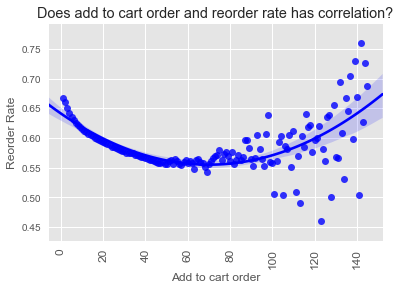

In [136]:
#plot a graph to indicate the relationship between add to cart order and reorder rate
sns.regplot(x = 'add_to_cart_order',y = 'reorder_rate',data = products_reorder_addtocart,
           color='blue',order = 2)
plt.xticks(rotation = 90,size = 12)
plt.xlabel('Add to cart order',size = 12)
plt.ylabel('Reorder Rate',size = 12)
plt.title('Does add to cart order and reorder rate has correlation?')

The graph is very interesting here in a way that reorder rates tend to be high on items that are added to cart at the beginning or at the end, while lower on those in the middle. This can help improve our prediction since we now can use the item's add to cart order average and items that tend to have higher or lower add to cart order would have higher reorder probability.

# User-Products Features

In [137]:
#Figure out how many of a certain item is ordered.
orders_product_prior_df = pd.merge(orders_and_prior, products_dept_aisle,on='product_id',how='left')

In [138]:
orders_product_prior_df.head(2)

,index,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,0,2539329,1,prior,1,2,8,-1.0,10.090909,196,1,0,Soda,77,7,beverages,soft drinks
1,1,2539329,1,prior,1,2,8,-1.0,10.090909,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs,soy lactosefree


In [139]:
users_orders_products = orders_product_prior_df.copy()

In [140]:
users_orders_products['user_and_product'] = users_orders_products.product_id + users_orders_products.user_id * 100000

In [141]:
users_orders_products = users_orders_products.sort_values('order_number')

In [142]:
users_orders_products = users_orders_products.groupby('user_and_product',sort=False).agg({'order_id': ['size', 'last'], 'add_to_cart_order': 'mean'})

In [143]:
users_orders_products.columns = ['number_of_orders_peruser_perproduct','last_order_id','average_add_to_cart_order']

In [144]:
users_orders_products=users_orders_products.reset_index()

In [145]:
users_orders_products=users_orders_products.set_index('user_and_product',drop=False)

In [146]:
del orders_product_prior_df

In [147]:
users_orders_products.head(2)

,user_and_product,number_of_orders_peruser_perproduct,last_order_id,average_add_to_cart_order
user_and_product,,,,
100196,100196,10,2550362,1.400000
12430845961,12430845961,3,1385973,6.333333


In [148]:
#figure out percent of orders by product vs hour of day ordered

# Train - Test Split

The training order products data above should be used to split between training (80%) and testing (20%) in order to validate the accuracy of the model created. Since the data is a lot, to expedite the process, we will take a sample of 500 users.

In [247]:
#only take 1000 sample of user ids in orders dataset
training_orders = orders[orders.eval_set == 'train']
print('len training_orders = ',training_orders.shape)
unique_users = training_orders['user_id'].unique()
print('unique users len = ',len(unique_users))
import random
sampled_users = random.sample(list(unique_users),500)
print('sampled users = ',len(sampled_users))
training_orders = training_orders[training_orders['user_id'].isin(sampled_users)]
print('len training_orders after sampling = ',training_orders.shape)

len training_orders =  (131209, 8)
unique users len =  131209
sampled users =  500
len training_orders after sampling =  (500, 8)


In [248]:
#split the 500 training data into train and test orders:
from sklearn.cross_validation import train_test_split
train_order, test_order = train_test_split(training_orders,test_size=0.2)

In [249]:
train_order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
1725260,1919566,103575,train,10,5,15,30.0,13.900000
3107005,1033867,187360,train,17,3,14,14.0,11.823529
1620418,3242654,97296,train,12,6,9,30.0,11.416667
3216421,1476503,193938,train,33,5,13,7.0,12.878788
2430155,1217619,146228,train,5,0,11,30.0,14.000000


In [250]:
#look at the train and test data:
train_order_id_list = train_order['order_id'].tolist()
test_order_id_list = test_order['order_id'].tolist()
print(len(train_order_id_list))
print(len(test_order_id_list))
#figure out the data in train data and test data
#1 order can have multiple products 
#take only the order id from the order_products_train.csv that are in the training set.

train_data = order_products_train[order_products_train['order_id'].isin(train_order_id_list)]
test_data = order_products_train[order_products_train['order_id'].isin(test_order_id_list)]
train_data.set_index(['order_id', 'product_id'], inplace=True, drop=False)
test_data.set_index(['order_id', 'product_id'], inplace=True, drop=False)
print(train_data.shape)
print(test_data.shape)

400
100
(4174, 4)
(1037, 4)


In [167]:
order_products_train.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [155]:
train_data.head()

order_id  product_id  add_to_cart_order  reordered
order_id product_id                                                    
22352    32478          22352       32478                  1          1
         41352          22352       41352                  2          0
         48697          22352       48697                  3          0
         25588          22352       25588                  4          1
30886    14233          30886       14233                  1          0

In [251]:
train_data = pd.merge(train_data,orders[['order_id','user_id']],on='order_id',how='left')


In [252]:
train_data.head(2)

,order_id,product_id,add_to_cart_order,reordered,user_id
0,4979,27845,1,1,83942
1,4979,40604,2,1,83942


In [253]:
train_data.set_index(['order_id', 'product_id'], inplace=True, drop=False)

In [254]:
train_data.head(2)

order_id  product_id  add_to_cart_order  reordered  \
order_id product_id                                                       
4979     27845           4979       27845                  1          1   
         40604           4979       40604                  2          1   

                     user_id  
order_id product_id           
4979     27845         83942  
         40604         83942

In [255]:
test_data = pd.merge(test_data,orders[['order_id','user_id']],on='order_id',how='left')

In [256]:
test_data.set_index(['order_id', 'product_id'], inplace=True, drop=False)

In [257]:
test_data.head(2)

order_id  product_id  add_to_cart_order  reordered  \
order_id product_id                                                       
11490    17758          11490       17758                  1          1   
         40198          11490       40198                  2          1   

                     user_id  
order_id product_id           
11490    17758        171903  
         40198        171903

# Dataframe with End Features

# FINAL DF

In [258]:
#create a function to figure out if the prior data is in the 
#train data to be able to know if the person reorders the item or not.

def build_df(str_train_or_test_df):
    if str_train_or_test_df =='train':
        train_or_test_df = train_data
    elif str_train_or_test_df == 'test':
        train_or_test_df = test_data
    order_list = []
    product_list = []
    check_if_prior_in_train = []
    #iterate over the rows in dataframe
    for row in train_or_test_df.itertuples():
        order_id = row.order_id
        user_id = row.user_id
        #find out all the products that the user has bought in the past
        list_products = users.All_products[user_id] 
        product_list += list_products
        #tell how many items there are in one order_id
        order_list += [order_id] * len(list_products)
        #Check if the products ordered in the past are in the training data
        if str_train_or_test_df =='train':
            #for every product in the say 1000 products PER order, check if the prior is in train
            check_if_prior_in_train += [(order_id, product) in train_data.index for product in list_products]
        elif str_train_or_test_df =='test':
            check_if_prior_in_train += [(order_id,product) in test_data.index for product in list_products]
    print('passed')
#create the orderlist and product list into dataframe to be able to predict which order
#will be re-ordered next
    temp_df = pd.DataFrame({'order_id':order_list, 'product_id':product_list}, dtype=np.int32)
    print(temp_df.shape)
    check_if_prior_in_train = np.array(check_if_prior_in_train, dtype=np.int8)
    del order_list
    del product_list
    
    final_df = pd.merge(temp_df,orders,on='order_id',how='left')
    #add columns into the dataframe
    final_df['Total_Orders_per_user'] = final_df.user_id.map(df_users6.Total_Orders_per_user)
    final_df['Total_Number_of_items'] = final_df.user_id.map(df_users6.Total_Number_of_items)
    final_df['Average_days_since_prior_order'] = final_df.user_id.map(df_users6.Average_days_since_prior_order)
    #final_df['Average_basket_size'] =  final_df.user_id.map(df_users6.Average_basket_size)
    #find out what time of the day does a specific order occur
    
#this helps figure out if it is time for the customer to actually re-order the product.
    final_df['days_since_ratio'] = final_df.days_since_prior_order / final_df.Average_days_since_prior_order
    #merge final_df with products df:
    final_df2 = pd.merge(final_df,products,on='product_id',how='left')
    #final_df['aisle_id'] = final_df.product_id.map(products.aisle_id)
    #final_df['department_id'] = final_df.product_id.map(products.department_id)
#reorder rate per product on all customers
    final_df3 = pd.merge(final_df2,df_products_dept[['average_add_to_cart_order','product_id','Number_of_times_reordered','total_order']]
                         ,on='product_id',how='left')
    final_df3['reordered_rate'] = final_df3['Number_of_times_reordered']/final_df3['total_order']

#number of orders per product

#merge with merged dataframe in order to figure out total order size, etc
    #final_df4 = pd.merge(final_df3,merged2,on=['user_id','product_id'],how='left')
#find out if the the hour is right for the person to reorder based on user id and product id historical order hour
    return(final_df3,check_if_prior_in_train)

#final_df['peruser_perproduct_difference_hour_vs_last'] =abs(final_df.order_hour_of_day - final_df.merge(orders, on=['user_id','product_id'])['average_hour_of_day'].map(lambda x: min(x,24-x)).astype(np.int8))

In [259]:
tr,y_tr = build_df('train')

passed
(337534, 2)


In [234]:
tr.head(2)

,order_id,product_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,Total_Orders_per_user,Total_Number_of_items,Average_days_since_prior_order,days_since_ratio,product_name,aisle_id,department_id,average_add_to_cart_order,Number_of_times_reordered,total_order,reordered_rate
0,22352,27521,53858,train,6,5,13,24.0,15.833333,19,200,10.219895,2.348361,Organic Lacinato (Dinosaur) Kale,83,4,8.159152,29936,40408,0.740843
1,22352,32134,53858,train,6,5,13,24.0,15.833333,19,200,10.219895,2.348361,Lactose Free Plain Kefir,120,16,6.150000,2393,3100,0.771935


In [261]:
y_tr[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0], dtype=int8)

In [262]:
#check for any missing values
tr.isnull().sum()

order_id                          0
product_id                        0
user_id                           0
eval_set                          0
order_number                      0
order_dow                         0
order_hour_of_day                 0
days_since_prior_order            0
average_order_hour_of_day         0
Total_Orders_per_user             0
Total_Number_of_items             0
Average_days_since_prior_order    0
days_since_ratio                  0
product_name                      0
aisle_id                          0
department_id                     0
average_add_to_cart_order         0
Number_of_times_reordered         0
total_order                       0
reordered_rate                    0
dtype: int64

Here we can see that in the tr model, there are no missing values.

#  MACHINE LEARNING 

I will be using several machine learning techniques here to predict which products each user is going to reorder. I will also compare several of the techniques in order to find out which algorithm produces the highest accuracy and efficient. By doing so, the algorithm that has the highest accuracy and efficiency would be recommended to Instacart.

# Logistic Regression

In [263]:
#input to logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
tr_x = tr[[
#'order_dow', #THIS IS CATEGORICAL                        
#'order_hour_of_day',  #THIS IS CATEGORICAL               
'days_since_prior_order',            
'average_order_hour_of_day',         
'Total_Orders_per_user',             
'Total_Number_of_items',             
'Average_days_since_prior_order',    
'days_since_ratio',                  
#'aisle_id', #THIS IS CATEGORICAL                          
#'department_id', #THIS IS CATEGORICAL                    
'average_add_to_cart_order',       
'Number_of_times_reordered',         
'total_order',                       
'reordered_rate'                    
]]
mdl = LogisticRegression()
mdl.fit(tr_x,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [264]:
mdl.predict(tr_x) #training

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [265]:
accuracy_score(mdl.predict(tr_x),y_tr) #accuracy on training

0.87280985026693603

In [266]:
#get test data
test,y_test = build_df('test')
test_x = test[[
#'order_dow', #THIS IS CATEGORICAL                        
#'order_hour_of_day',  #THIS IS CATEGORICAL               
'days_since_prior_order',            
'average_order_hour_of_day',         
'Total_Orders_per_user',             
'Total_Number_of_items',             
'Average_days_since_prior_order',    
'days_since_ratio',                  
#'aisle_id', #THIS IS CATEGORICAL                          
#'department_id', #THIS IS CATEGORICAL                    
'average_add_to_cart_order',       
'Number_of_times_reordered',         
'total_order',                       
'reordered_rate'                    
]]

passed
(74376, 2)


In [267]:
y_pred_proba = mdl.predict_proba(test_x)[:,1]

In [290]:
y_pred=[]
prob_thres = 0.62
for prob in y_pred_proba:
    if prob<prob_thres:
        y_pred.append(0)
    else:
        y_pred.append(1)

print('accuracy score: ',accuracy_score(y_pred,y_test)) #accuracy on training
        

accuracy score:  0.877769710659


# Decision Tree

# Random Forest

# Gradient Boosting